# house prices forecast


### We will train a model that predicts the square meter prices of houses. For this, the model will be developed by comparing the ages of the houses, their location, the number of nearby markets, and their proximity to the MRT station

<img src=https://www.forbes.com/advisor/wp-content/uploads/2021/12/housing_predictions.jpg width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('Real_Estate.csv')

In [3]:
df.head()  

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.drop('Transaction date', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            414 non-null    float64
 1   Distance to the nearest MRT station  414 non-null    float64
 2   Number of convenience stores         414 non-null    int64  
 3   Latitude                             414 non-null    float64
 4   Longitude                            414 non-null    float64
 5   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [7]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [8]:
df.isnull().sum()

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [9]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [10]:
df.shape

(414, 6)

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization

In [13]:
x=df.drop('House price of unit area', axis=1)
y=df[['House price of unit area']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [16]:
x_train

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
192,13.3,2147.37600,3,24.933732,121.564450
234,19.2,90.45606,5,24.986418,121.478117
5,13.3,279.17260,2,24.994994,121.543823
45,8.0,405.21340,4,24.993687,121.529953
245,37.1,1559.82700,4,24.957858,121.564699
...,...,...,...,...,...
71,12.0,2408.99300,9,24.932844,121.551066
106,4.5,579.20830,7,25.014003,121.519101
270,30.4,444.13340,0,24.950815,121.544501
348,20.0,552.43710,1,24.958066,121.477361


In [17]:
y_train

,House price of unit area
192,0.365176
234,26.484981
5,36.972376
45,34.218656
245,16.344675
...,...
71,25.696463
106,42.829193
270,11.277817
348,29.726401


In [18]:
model=Sequential()

model.add(Dense(180,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(90,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mse', optimizer='adam')

In [19]:

history=model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=15,epochs=500,verbose=1)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1050.1497 - val_loss: 1160.5222
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 948.6659 - val_loss: 1142.9453
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 994.1766 - val_loss: 1139.3176
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1016.5594 - val_loss: 1129.5067
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 886.4034 - val_loss: 1112.2738
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 806.6785 - val_loss: 1074.2931
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 843.6330 - val_loss: 1024.0615
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 816.5728 - val_loss: 866.4354
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 725.8866 - val_loss: 811.8868
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 684.1329 - val_loss: 741.8988
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 602.2460 - val_loss: 649.223

Epoch 67/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 162.8026 - val_loss: 143.4936
Epoch 68/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 139.1884 - val_loss: 136.7868
Epoch 69/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 143.5490 - val_loss: 134.3410
Epoch 70/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 169.1787 - val_loss: 132.6300
Epoch 71/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 159.2486 - val_loss: 137.4734
Epoch 72/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146.8504 - val_loss: 140.5109
Epoch 73/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 149.6325 - val_loss: 136.1219
Epoch 74/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157.5814 - val_loss: 136.4290
Epoch 75/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 150.7568 - val_loss: 142.8738
Epoch 76/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 156.3980 - val_loss: 141.2451
Epoch 77/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 154.5440 - val_loss: 141.7

Epoch 197/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 131.7661 - val_loss: 121.0091
Epoch 198/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 125.8926 - val_loss: 120.8783
Epoch 199/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 137.7304 - val_loss: 117.2151
Epoch 200/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 137.4436 - val_loss: 118.4854
Epoch 201/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 136.2861 - val_loss: 120.5801
Epoch 202/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 145.8142 - val_loss: 116.6510
Epoch 203/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 128.6938 - val_loss: 119.7769
Epoch 204/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132.3983 - val_loss: 123.1038
Epoch 205/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 141.9199 - val_loss: 117.7325
Epoch 206/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 127.3489 - val_loss: 116.0426
Epoch 207/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 140.1771 

Epoch 326/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 132.2398 - val_loss: 122.1163
Epoch 327/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 115.2492 - val_loss: 126.0862
Epoch 328/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 132.5381 - val_loss: 120.0886
Epoch 329/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 131.6985 - val_loss: 120.2346
Epoch 330/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.7310 - val_loss: 124.0399
Epoch 331/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115.9445 - val_loss: 125.1060
Epoch 332/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 125.9256 - val_loss: 125.9588
Epoch 333/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 109.2448 - val_loss: 125.0996
Epoch 334/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 127.1961 - val_loss: 114.9874
Epoch 335/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 128.0451 - val_loss: 122.0141
Epoch 336/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 119.0786 - 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 118.5264 - val_loss: 117.9895
Epoch 392/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 115.9925 - val_loss: 123.4011
Epoch 393/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 129.3589 - val_loss: 136.6665
Epoch 394/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 114.0025 - val_loss: 122.0506
Epoch 395/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130.2904 - val_loss: 123.1830
Epoch 396/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 129.3039 - val_loss: 122.1774
Epoch 397/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 121.8177 - val_loss: 125.1493
Epoch 398/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 134.5231 - val_loss: 121.7129
Epoch 399/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 119.5902 - val_loss: 119.4502
Epoch 400/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121.2493 - val_loss: 118.9588
Epoch 401/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118.3575 - val_loss: 120.9829

Epoch 456/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 121.5714 - val_loss: 122.9839
Epoch 457/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 114.0656 - val_loss: 127.9378
Epoch 458/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 119.9771 - val_loss: 126.3722
Epoch 459/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 127.1341 - val_loss: 124.7958
Epoch 460/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 128.9812 - val_loss: 122.1118
Epoch 461/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 122.0783 - val_loss: 124.0862
Epoch 462/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.6696 - val_loss: 123.3333
Epoch 463/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 130.6725 - val_loss: 119.3723
Epoch 464/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 115.6118 - val_loss: 117.7963
Epoch 465/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 110.2433 - val_loss: 123.3455
Epoch 466/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 131.0705 

In [20]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
r2_score(y_test,tahmin)

0.5435543626203896

In [23]:
mean_squared_error(y_test,tahmin)**.5

11.237085017969257

In [24]:
model.save('model.keras')

In [25]:
import matplotlib.pyplot as plt

In [26]:
loss_f=pd.DataFrame(history.history)

<Axes: >

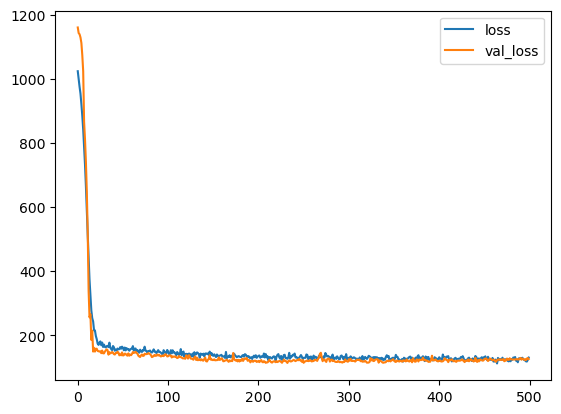

In [27]:
loss_f.plot()

## As a result, r2 score (0.55) and mean_squared_error (11.451353319527655) were obtained

In [30]:
#pip install pycaret

In [31]:
from pycaret.regression import*

In [32]:
import pandas as pd

In [33]:
df=pd.read_csv('Real_Estate.csv')

In [34]:
setup(data=df,target='House price of unit area')

,Description,Value
0,Session id,2364
1,Target,House price of unit area
2,Target type,Regression
3,Original data shape,"(414, 7)"
4,Transformed data shape,"(414, 7)"
5,Transformed train set shape,"(289, 7)"
6,Transformed test set shape,"(125, 7)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [35]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,10.2337,153.8303,12.3706,0.3289,0.7985,0.7183,0.0060
knn,K Neighbors Regressor,10.4447,167.9824,12.8968,0.2693,0.7604,0.6123,0.0080
en,Elastic Net,11.8848,204.9055,14.2386,0.1302,1.0143,0.9253,0.0060
lasso,Lasso Regression,12.7317,240.6659,15.4156,-0.0175,1.0617,1.0018,0.0060
llar,Lasso Least Angle Regression,12.7315,240.6589,15.4153,-0.0175,1.0617,1.0018,0.0060
et,Extra Trees Regressor,12.9058,248.1462,15.6504,-0.0486,1.0700,1.0184,0.0190
huber,Huber Regressor,12.9113,249.0561,15.6744,-0.0507,1.0716,1.0217,0.0090
lightgbm,Light Gradient Boosting Machine,12.9262,249.5025,15.6882,-0.0535,1.0724,1.0274,0.0080
ridge,Ridge Regression,12.9273,249.6569,15.6949,-0.0544,1.0727,1.0219,0.0050
gbr,Gradient Boosting Regressor,12.9283,249.7211,15.6985,-0.0550,1.0730,1.0214,0.0170


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

# AutoML version 0.32 is now available for R2